## 混淆矩阵
混淆矩阵也称误差矩阵，是表示精度评价的一种标准格式，用n行n列的矩阵形式来表示。具体评价指标有总体精度、制图精度、用户精度等，这些精度指标从不同的侧面反映了图像分类的精度。在人工智能中，混淆矩阵（confusion matrix）是可视化工具，特别用于监督学习，在无监督学习一般叫做匹配矩阵。在图像精度评价中，主要用于比较分类结果和实际测得值，可以把分类结果的精度显示在一个混淆矩阵里面。混淆矩阵是通过将每个实测像元的位置和分类与分类图像中的相应位置和分类相比较计算的。

混淆矩阵的每一列代表了预测类别，每一列的总数表示预测为该类别的数据的数目；每一行代表了数据的真实归属类别，每一行的数据总数表示该类别的数据实例的数目。

### 举例
如有150个样本数据，预测为1,2,3类各为50个。分类结束后得到的混淆矩阵为：
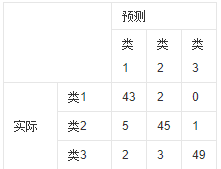

每一行之和表示该类别的真实样本数量，每一列之和表示被预测为该类别的样本数量，
第一行说明有43个属于第一类的样本被正确预测为了第一类，有两个属于第一类的样本被错误预测为了第二类

### Python代码实现混淆矩阵
Python中的sklearn库提供了相应的方法来输出矩阵数据，非常方便。

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

其中，y_true:是样本真实分类结果，y_pred 是样本预测分类结果 ，labels是所给出的类别，通过这个可对类别进行选择 ，sample_weight 是样本权重。这里我们用代码演示三分类问题混淆矩阵（这里我们用confusion_matrix生成矩阵数据，然后用seaborn的热度图绘制出混淆矩阵数据），如下：

In [1]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
y_true = ["cat", "dog", "cat", "cat", "dog", "rebit"]
y_pred = ["dog", "dog", "rebit", "cat", "dog", "cat"]
C2= confusion_matrix(y_true, y_pred, labels=["dog", "rebit", "cat"])
sns.heatmap(C2,annot=True)
plt.show()

<Figure size 640x480 with 2 Axes>

## 离散值处理
原始数据如下：

In [2]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'prize', 'class label']
df

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


原始处理方法（将类别变量映射为数值变量）

In [3]:
# 自动映射
class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}

df['class label'] = df['class label'].map(class_mapping)

# 指定映射对
size_mapping = {
"XL": 3,
"L": 2,
"M": 1}

df['size'] = df['size'].map(size_mapping)

color_mapping = {
'green': (0,0,1),
'red': (0,1,0),
'blue': (1,0,0)}

df['color'] = df['color'].map(color_mapping)
df
 



,color,size,prize,class label
0,"(0, 0, 1)",1,10.1,0
1,"(0, 1, 0)",2,13.5,1
2,"(1, 0, 0)",3,15.3,0


In [4]:
# 逆映射
inv_color_mapping = {v: k for k, v in color_mapping.items()}
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_class_mapping = {v: k for k, v in class_mapping.items()}

df['color'] = df['color'].map(inv_color_mapping)

df['size'] = df['size'].map(inv_size_mapping)
df['class label'] = df['class label'].map(inv_class_mapping)
df

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


使用scikit LabelEncoder处理标签变量映射

In [5]:
# 标签类型----数值类型映射
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
df['class label'] = class_le.fit_transform(df['class label'])

df

,color,size,prize,class label
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [6]:
# 逆映射
df['class label'] = class_le.inverse_transform(df['class label'])
df

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


OneHotEncoder（OneHotEncoder 必须使用整数作为输入，所以得先预处理一下）

In [13]:
# 数据预处理
color_le = LabelEncoder()
df['color'] = color_le.fit_transform(df['color'])

#热编码
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto')

X = ohe.fit_transform(df[['color']].values)
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

get_dummies（只处理类别型变量）

In [9]:
# 数据预处理
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'prize', 'class label']

size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}
df['size'] = df['size'].map(size_mapping)

class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}
df['class label'] = df['class label'].map(class_mapping)
# 热编码
pd.get_dummies(df)

,size,prize,class label,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


scikit DictVectorizer 热编码（只处理类别型变量）

In [10]:
# 数据预处理
df.transpose().to_dict().values()
feature = df.iloc[:, :-1]
feature


# 热编码
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)

X = dvec.fit_transform(feature.transpose().to_dict().values())
pd.DataFrame(X, columns=dvec.get_feature_names())

,color=blue,color=green,color=red,prize,size
0,0.0,1.0,0.0,10.1,1.0
1,0.0,0.0,1.0,13.5,2.0
2,1.0,0.0,0.0,15.3,3.0
